In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from datasets.nuscenes import *
from datasets.carla import compile_data as cpdc
from tools.utils import *
from tools.loss import *

%matplotlib inline
import matplotlib.pyplot as plt

from numpy.linalg import inv

In [4]:
loader = compile_data("val", "mini", "../../data/nuscenes", "vehicle", mini=True)

In [5]:
loader_c = cpdc("val", "mini", "../../data/carla", "vehicle")

In [6]:
model = Evidential(backbone="lss", devices=[7])
# model.load(torch.load("../outputs/aug/19.pt"))

Loaded pretrained weights for efficientnet-b0
BETA LAMBDA: 0.001


In [31]:
images, intrinsics, extrinsics, labels, oods = loader_c.dataset[2]
images = images[None].to(7)
intrinsics = intrinsics[None].to(7)
extrinsics = extrinsics[None].to(7)
pts = model.backbone.module.get_geometry(intrinsics, extrinsics).cpu().numpy()

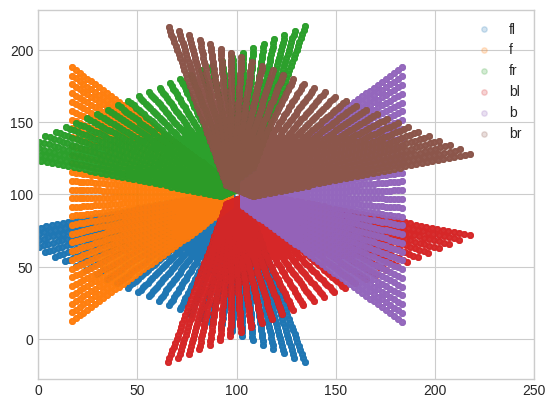

In [32]:
# plt.imshow(map_rgb(labels, ego=True) / 255)

cam = ['fl', 'f', 'fr', 'bl', 'b', 'br']

for i in range(6):
    plt.scatter(pts[:, i, :, :, :, 0].reshape(-1) * 2 + 100, pts[:, i, :, :, :, 1].reshape(-1) * 2+ 100, s=15, label=cam[i], alpha=.2, edgecolors='face')

plt.xlim(0, 250)
# plt.ylim(0, 200)
plt.legend(loc='upper right')